In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("Telecom_customer churn (100000).csv")

In [2]:
num_df = df.select_dtypes(include=['float64', 'int64']).copy()
cat_df = df.select_dtypes(include=['object']).copy()

# Categorical boolean mask
categorical_feature_mask = cat_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = cat_df.columns[categorical_feature_mask].tolist()

import numpy as np
#conData=np.log(0.00001 + 1)
conData=0
cat_df=cat_df.fillna(conData)
num_df=num_df.fillna(conData)
cat_df=cat_df.astype(str)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_df[categorical_cols] = cat_df[categorical_cols].apply(lambda col: le.fit_transform(col))

#cat_df[categorical_cols].head(10)

change_mou=num_df['change_mou']
change_rev=num_df['change_rev']
num_df=num_df.drop(['change_mou'], axis=1)
num_df=num_df.drop(['change_rev'], axis=1)

num_df=num_df.drop(['Customer_ID'], axis=1)

churn=num_df['churn']
num_df=num_df.drop(['churn'], axis=1)

#no convertion

num_df=num_df.fillna(conData)

num_df[num_df < 0]=0

result_df = pd.concat([num_df, cat_df], axis=1)
np.nan_to_num(result_df)

result_df_op=result_df
#result_df_op=result_df_op.drop(['churn'], axis=1)
#result_df_op=np.nan_to_num(result_df_op)

X=result_df_op
#y=result_df['churn'] 
y=churn

#from sklearn.model_selection import train_test_split  
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0, random_state=42)
X_train=X
y_train=y

In [3]:
X_train.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,drop_vce_Mean,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,0.666667,...,1,3,1,10,1,1,1,1,1,2
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,8.333333,...,1,3,1,17,1,1,1,1,1,2
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,0.333333,...,1,3,1,10,1,2,1,1,1,2
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,0.000000,...,1,3,4,15,2,1,1,1,1,2
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,9.666667,...,1,3,15,7,1,1,1,1,1,2


In [5]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
classifier = GaussianNB()

classifier.fit(X_train,y_train)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

from sklearn.model_selection import cross_val_score
roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
print('roc_auc: ',roc_auc.mean())

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)

8883 41555 7187 42375
pod:  0.8549897098583592
pof:  0.8238827867877394
AUC:  0.5155534615353099
roc_auc:  0.5596483312814653
auc:  0.5155534615353099


In [4]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)


#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

28292 22146 23977 25585
pod:  0.5162221056454542
pof:  0.43907371426305564
AUC:  0.5385741956911992


In [3]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

28297 22141 19940 29622
pod:  0.5976756385940841
pof:  0.43897458265593403
AUC:  0.5793505279690749


auc:  0.579350527969075


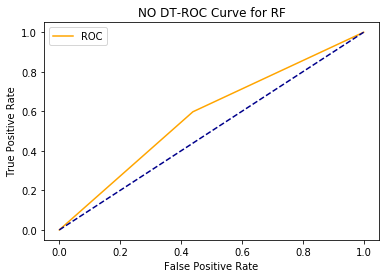

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NO DT-ROC Curve for RF')
plt.legend()
plt.show()

In [6]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression()
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

30114 20324 20552 29010
pod:  0.5853274686251564
pof:  0.40295015662793926
AUC:  0.5911886559986086


In [4]:
#SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)



32500 17938 26540 23022
pod:  0.4645090997134902
pof:  0.35564455370950476
AUC:  0.5544322730019927


In [5]:
classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [8]:
#FNN
def get_FNN_Predict(X2_train, X2_test, y2_train, y2_test):
    from keras.models import Sequential
    from keras.layers import Dense
    #create model
    model = Sequential()
    #get number of columns in training data
    n_cols = X2_train.shape[1]
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model using mse as a measure of model performance
    #model.compile(optimizer='adam', loss='mean_squared_error')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
    from keras.callbacks import EarlyStopping
    #set early stopping monitor so the model stops training when it won't improve anymore
    early_stopping_monitor = EarlyStopping(patience=3)
    #train model
    model.fit(X2_train, y2_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
    y2_pred = model.predict(X2_test)
    print('y2_pred: ',y2_pred)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_FNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

tn=sum(tn_list)
fp=sum(fp_list) 
fn=sum(fn_list) 
tp=sum(tp_list)
print(tn, fp, fn, tp)

Using TensorFlow backend.


Train on 71999 samples, validate on 18000 samples
Epoch 1/30
71999/71999 [==============================] - 24s 333us/step - loss: 2.1958 - accuracy: 0.5149 - val_loss: 0.6974 - val_accuracy: 0.4277
Epoch 2/30
71999/71999 [==============================] - 25s 353us/step - loss: 0.6960 - accuracy: 0.5199 - val_loss: 0.7012 - val_accuracy: 0.4119
Epoch 3/30
71999/71999 [==============================] - 23s 320us/step - loss: 0.7049 - accuracy: 0.5180 - val_loss: 0.6973 - val_accuracy: 0.4206
Epoch 4/30
71999/71999 [==============================] - 22s 304us/step - loss: 0.7009 - accuracy: 0.5177 - val_loss: 0.7010 - val_accuracy: 0.4087
Epoch 5/30
71999/71999 [==============================] - 23s 319us/step - loss: 0.6940 - accuracy: 0.5173 - val_loss: 0.7008 - val_accuracy: 0.4087
Epoch 6/30
71999/71999 [==============================] - 22s 310us/step - loss: 0.6962 - accuracy: 0.5182 - val_loss: 0.7021 - val_accuracy: 0.4100
y2_pred:  [[0.521973 ]
 [0.521973 ]
 [0.521973 ]
 ...
 [

In [9]:
#RNN
def get_RNN_Predict(X2_train, X2_test, y2_train, y2_test):
    import pandas as pd
    from keras.models import Sequential
    from keras.layers import Dense,Dropout, LSTM, GRU
    from keras.layers import Embedding
    max_features = 400000 # number of words to consider as features
    import numpy as np
    #create model 
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X2_train, y2_train, epochs=5, batch_size=128, validation_split=0.2)
    y2_pred = model.predict(X2_test)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_RNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

tn=sum(tn_list)
fp=sum(fp_list) 
fn=sum(fn_list) 
tp=sum(tp_list)
print(tn, fp, fn, tp)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 71999 samples, validate on 18000 samples
Epoch 1/5
71999/71999 [==============================] - 154s 2ms/step - loss: 0.6893 - acc: 0.5377 - val_loss: 0.6836 - val_acc: 0.5614
Epoch 2/5
71999/71999 [==============================] - 154s 2ms/step - loss: 0.6774 - acc: 0.5738 - val_loss: 0.7093 - val_acc: 0.5218
Epoch 3/5
71999/71999 [==============================] - 153s 2ms/step - loss: 0.6623 - acc: 0.6037 - val_loss: 0.7278 - val_acc: 0.5089
Epoch 4/5
71999/71999 [==============================] - 152s 2ms/step - loss: 0.6394 - acc: 0.6358 - val_loss: 0.7040 - val_acc: 0.5682
Epoch 5/5
71999/71999 [==============================] - 154s 2ms/step - loss: 0.6198 - acc: 0.6579 - val_loss: 0.6950 - val_acc: 0.5822
y22_pred:  [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
pod 1st:  0.40084728666532177


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 71999 samples, validate on 18000 samples
Epoch 1/5
71999/71999 [==============================] - 157s 2ms/step - loss: 0.6879 - acc: 0.5403 - val_loss: 0.6682 - val_acc: 0.5966
Epoch 2/5
71999/71999 [==============================] - 153s 2ms/step - loss: 0.6773 - acc: 0.5747 - val_loss: 0.7302 - val_acc: 0.4840
Epoch 3/5
71999/71999 [==============================] - 156s 2ms/step - loss: 0.6636 - acc: 0.6020 - val_loss: 0.6838 - val_acc: 0.5633
Epoch 4/5
71999/71999 [==============================] - 152s 2ms/step - loss: 0.6392 - acc: 0.6377 - val_loss: 0.6824 - val_acc: 0.5721
Epoch 5/5
71999/71999 [==============================] - 153s 2ms/step - loss: 0.6164 - acc: 0.6616 - val_loss: 0.6826 - val_acc: 0.5825
y22_pred:  [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
pod 1st:  0.5874520879564252


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 72000 samples, validate on 18000 samples
Epoch 1/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6863 - acc: 0.5464 - val_loss: 0.6722 - val_acc: 0.5849
Epoch 2/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6711 - acc: 0.5872 - val_loss: 0.6712 - val_acc: 0.5899
Epoch 3/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6505 - acc: 0.6212 - val_loss: 0.6752 - val_acc: 0.5852
Epoch 4/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6284 - acc: 0.6468 - val_loss: 0.7081 - val_acc: 0.5764
Epoch 5/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6081 - acc: 0.6685 - val_loss: 0.6953 - val_acc: 0.5892
y22_pred:  [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]]
pod 1st:  0.5209846650524617


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 72000 samples, validate on 18000 samples
Epoch 1/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6876 - acc: 0.5425 - val_loss: 0.6911 - val_acc: 0.5435
Epoch 2/5
72000/72000 [==============================] - 149s 2ms/step - loss: 0.6747 - acc: 0.5803 - val_loss: 0.6741 - val_acc: 0.5821
Epoch 3/5
72000/72000 [==============================] - 148s 2ms/step - loss: 0.6547 - acc: 0.6165 - val_loss: 0.6745 - val_acc: 0.5822
Epoch 4/5
72000/72000 [==============================] - 148s 2ms/step - loss: 0.6294 - acc: 0.6474 - val_loss: 0.6755 - val_acc: 0.5947
Epoch 5/5
72000/72000 [==============================] - 149s 2ms/step - loss: 0.6085 - acc: 0.6671 - val_loss: 0.6944 - val_acc: 0.5771
y22_pred:  [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]]
pod 1st:  0.5667877320419693


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 72000 samples, validate on 18000 samples
Epoch 1/5
72000/72000 [==============================] - 154s 2ms/step - loss: 0.6870 - acc: 0.5436 - val_loss: 0.6906 - val_acc: 0.5458
Epoch 2/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6726 - acc: 0.5846 - val_loss: 0.6700 - val_acc: 0.5853
Epoch 3/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6484 - acc: 0.6243 - val_loss: 0.6744 - val_acc: 0.5793
Epoch 4/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6256 - acc: 0.6524 - val_loss: 0.6804 - val_acc: 0.5863
Epoch 5/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6027 - acc: 0.6749 - val_loss: 0.7358 - val_acc: 0.5417
y22_pred:  [[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
pod 1st:  0.7082324455205811


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 72000 samples, validate on 18000 samples
Epoch 1/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6875 - acc: 0.5427 - val_loss: 0.6690 - val_acc: 0.5890
Epoch 2/5
72000/72000 [==============================] - 154s 2ms/step - loss: 0.6751 - acc: 0.5785 - val_loss: 0.6809 - val_acc: 0.5622
Epoch 3/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6596 - acc: 0.6093 - val_loss: 0.6870 - val_acc: 0.5636
Epoch 4/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6343 - acc: 0.6430 - val_loss: 0.6923 - val_acc: 0.5686
Epoch 5/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6123 - acc: 0.6642 - val_loss: 0.7215 - val_acc: 0.5735
y22_pred:  [[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]
pod 1st:  0.5328894269572235


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 72000 samples, validate on 18000 samples
Epoch 1/5
72000/72000 [==============================] - 154s 2ms/step - loss: 0.6862 - acc: 0.5454 - val_loss: 0.6945 - val_acc: 0.5299
Epoch 2/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6718 - acc: 0.5823 - val_loss: 0.6868 - val_acc: 0.5707
Epoch 3/5
72000/72000 [==============================] - 154s 2ms/step - loss: 0.6502 - acc: 0.6179 - val_loss: 0.6791 - val_acc: 0.5766
Epoch 4/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6271 - acc: 0.6472 - val_loss: 0.7232 - val_acc: 0.5508
Epoch 5/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6060 - acc: 0.6676 - val_loss: 0.7031 - val_acc: 0.5670
y22_pred:  [[0.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [0.]]
pod 1st:  0.5062550443906376


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 72000 samples, validate on 18000 samples
Epoch 1/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6877 - acc: 0.5410 - val_loss: 0.6870 - val_acc: 0.5441
Epoch 2/5
72000/72000 [==============================] - 150s 2ms/step - loss: 0.6790 - acc: 0.5699 - val_loss: 0.6899 - val_acc: 0.5380
Epoch 3/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6660 - acc: 0.5971 - val_loss: 0.7026 - val_acc: 0.5364
Epoch 4/5
72000/72000 [==============================] - 151s 2ms/step - loss: 0.6434 - acc: 0.6328 - val_loss: 0.7105 - val_acc: 0.5318
Epoch 5/5
72000/72000 [==============================] - 151s 2ms/step - loss: 0.6195 - acc: 0.6598 - val_loss: 0.7197 - val_acc: 0.5537
y22_pred:  [[0.]
 [0.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]
pod 1st:  0.46246973365617433


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 72000 samples, validate on 18001 samples
Epoch 1/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6889 - acc: 0.5389 - val_loss: 0.6788 - val_acc: 0.5764
Epoch 2/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6771 - acc: 0.5774 - val_loss: 0.6871 - val_acc: 0.5475
Epoch 3/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6604 - acc: 0.6060 - val_loss: 0.7289 - val_acc: 0.5040
Epoch 4/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6370 - acc: 0.6375 - val_loss: 0.7110 - val_acc: 0.5609
Epoch 5/5
72000/72000 [==============================] - 153s 2ms/step - loss: 0.6170 - acc: 0.6577 - val_loss: 0.7102 - val_acc: 0.5545
y22_pred:  [[1.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]
pod 1st:  0.5659806295399515


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 72000 samples, validate on 18001 samples
Epoch 1/5
72000/72000 [==============================] - 151s 2ms/step - loss: 0.6885 - acc: 0.5374 - val_loss: 0.6776 - val_acc: 0.5742
Epoch 2/5
72000/72000 [==============================] - 152s 2ms/step - loss: 0.6768 - acc: 0.5756 - val_loss: 0.6714 - val_acc: 0.5780
Epoch 3/5
72000/72000 [==============================] - 151s 2ms/step - loss: 0.6604 - acc: 0.6061 - val_loss: 0.7294 - val_acc: 0.5091
Epoch 4/5
72000/72000 [==============================] - 151s 2ms/step - loss: 0.6375 - acc: 0.6364 - val_loss: 0.7185 - val_acc: 0.5324
Epoch 5/5
72000/72000 [==============================] - 151s 2ms/step - loss: 0.6161 - acc: 0.6600 - val_loss: 0.7393 - val_acc: 0.5388
y22_pred:  [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [0.]]
pod 1st:  0.6364003228410008
pod:  [0.40084728666532177, 0.5874520879564252, 0.5209846650524617, 0.5667877320419693, 0.7082324455205811, 0.5328894269572235, 0.5062550443906376, 0.46246973365617433, 0.565980629539

In [ ]:
#CNN - 1D CNN
def get_CNN_Predict(X2_train, X2_test, y2_train, y2_test):
    from keras.models import Sequential
    from keras import layers
    from keras.optimizers import RMSprop
    max_features = 400000 # number of words to consider as features
    
    model = Sequential()
    model.add(layers.Embedding(max_features, 128, input_length=96))
    model.add(layers.Conv1D(32, 7, activation='relu'))
    model.add(layers.MaxPooling1D(5))
    model.add(layers.Conv1D(32, 7, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(1))
    model.summary()
    model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X2_train, y2_train, epochs=5, batch_size=128, validation_split=0.2)
    y2_pred = model.predict(X2_test)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_CNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

print ('tn mean: ',sum(tn_list) / len(tn_list))
print ('fp mean: ',sum(fp_list) / len(fp_list))
print ('fn mean: ',sum(fn_list) / len(fn_list))
print ('tp mean: ',sum(tp_list) / len(tp_list))


In [6]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

26402 24036 23515 26047
pod:  0.5255437633670957
pof:  0.476545461755026
AUC:  0.5244991508060348


In [7]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

28087 22351 18218 31344
pod:  0.63241999919293
pof:  0.44313811015504184
AUC:  0.5946409445189441
accuracy:  0.59431
